In [1]:
!pip install tensorflow

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

2.8.0


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


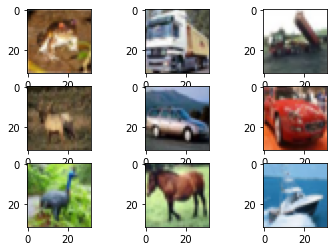

In [3]:
# loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset y 

(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
 # show the figure
pyplot.show()

In [4]:
#the data is displayed as an array per each value
trainy

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
#it is necessary to just create one array with all the data
trainy=trainy.reshape(-1,)
trainy

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [6]:
#Data in integers
trainX

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [7]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

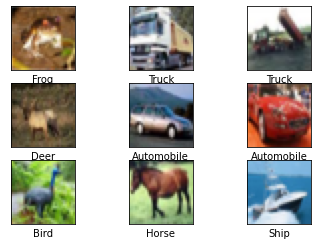

In [8]:
for i in range(9):
    plt.subplot(330 +1 +i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainy[i]])
plt.show()

In [9]:
#normalize data
# convert from integers to floats
#train_norm = train.astype('float32')
#test_norm = test.astype('float32')
# normalize to range 0-1
train_image_norm = trainX / 255.0
test_image_norm = testX / 255.0

train_label_norm = trainy
test_label_norm =testy

In [10]:
#Data is between 0 and 1
train_image_norm

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [11]:
#data augmentation
data_augmentation= keras.Sequential([
   layers.experimental.preprocessing.RandomRotation(0.1),
   layers.experimental.preprocessing.RandomZoom(0.3),
   layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical", input_shape=(32,32,3)),
   layers.experimental.preprocessing.RandomContrast(0.2),
   
  
])

In [12]:
from keras import regularizers

model = tf.keras.Sequential([
   data_augmentation,                         
   tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001),input_shape=(32, 32, 3)), 
   tf.keras.layers.BatchNormalization(),                   
   tf.keras.layers.MaxPooling2D((2, 2)),
   
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
   tf.keras.layers.BatchNormalization(), 
   tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
   tf.keras.layers.BatchNormalization(), 
   tf.keras.layers.MaxPooling2D((2, 2)),
   
   tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
   tf.keras.layers.BatchNormalization(), 
   tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
   tf.keras.layers.BatchNormalization(), 
   tf.keras.layers.MaxPooling2D((2, 2)),
   
   tf.keras.layers.Conv2D(filters=254, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
   tf.keras.layers.BatchNormalization(), 
   tf.keras.layers.Conv2D(filters=254, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
   tf.keras.layers.BatchNormalization(), 
   tf.keras.layers.MaxPooling2D((2, 2)),
  
   tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
   tf.keras.layers.BatchNormalization(), 
   tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
   tf.keras.layers.BatchNormalization(), 
   tf.keras.layers.MaxPooling2D((2, 2)),
   


    tf.keras.layers.Flatten(),
     
 
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(), 
     tf.keras.layers.Dropout(0.3),

     tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
     tf.keras.layers.BatchNormalization(), 
     tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(10,activation='softmax' )
])
#model.summary()



In [13]:
# Compile the model.
model.compile(
   loss='sparse_categorical_crossentropy',
    optimizer='SGD', 
   metrics=['accuracy']
)

In [14]:
model_training_history=model.fit(
    train_image_norm, 
    train_label_norm, 
    batch_size=32,
    epochs=120,
    validation_data=(test_image_norm, test_label_norm))

Epoch 1/120
1563/1563 [==============================] - 33s 16ms/step - loss: 3.8542 - accuracy: 0.2712 - val_loss: 3.4169 - val_accuracy: 0.3935
Epoch 2/120
1563/1563 [==============================] - 24s 15ms/step - loss: 3.3784 - accuracy: 0.3850 - val_loss: 3.2127 - val_accuracy: 0.4198
Epoch 3/120
1563/1563 [==============================] - 23s 14ms/step - loss: 3.1524 - accuracy: 0.4375 - val_loss: 2.9336 - val_accuracy: 0.5018
Epoch 4/120
1563/1563 [==============================] - 23s 15ms/step - loss: 2.9813 - accuracy: 0.4712 - val_loss: 2.7301 - val_accuracy: 0.5469
Epoch 5/120
1563/1563 [==============================] - 23s 15ms/step - loss: 2.8345 - accuracy: 0.4993 - val_loss: 2.7678 - val_accuracy: 0.5186
Epoch 6/120
1563/1563 [==============================] - 24s 15ms/step - loss: 2.6983 - accuracy: 0.5180 - val_loss: 2.6359 - val_accuracy: 0.5228
Epoch 7/120
1563/1563 [==============================] - 26s 16ms/step - loss: 2.5811 - accuracy: 0.5366 - val_loss: 2

In [15]:
model.evaluate(test_image_norm, test_label_norm)


313/313 [==============================] - 2s 5ms/step - loss: 0.9280 - accuracy: 0.8190


[0.9279863238334656, 0.8190000057220459]

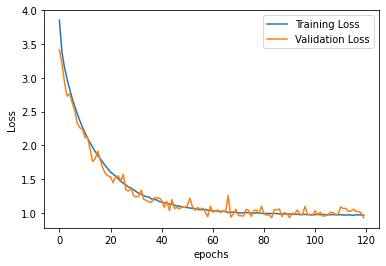

In [16]:
#Display our data
import matplotlib.pyplot as plt

# If we want to be fancy, we can set a theme by uncommenting the below line.
#plt.style.use('ggplot')


loss = model_training_history.history['loss']
val_loss = model_training_history.history['val_loss']

# Training loss, and Validation loss. Providing labels is useful for our legend later.
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")

# X and Y axes labels.
plt.ylabel('Loss')
plt.xlabel('epochs')



# Display a legend.
plt.legend()


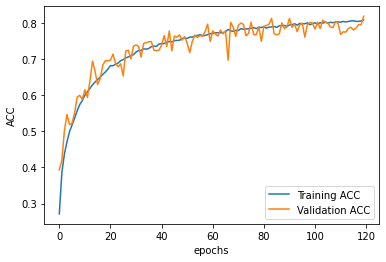

In [17]:
# Get our accuracy and loss metrics (these should be lists of numbers)
acc = model_training_history.history['accuracy']
val_acc = model_training_history.history['val_accuracy']


plt.plot(acc, label="Training ACC")
plt.plot(val_acc, label="Validation ACC")

# X and Y axes labels.
plt.ylabel('ACC')
plt.xlabel('epochs')



# Display a legend.
plt.legend()

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(test_image_norm)
print(y_pred)
y_pred_clasess= [np.argmax(element) for element in y_pred]

print(y_pred_clasess)
print("Clasification: \n", classification_report(test_label_norm, y_pred_clasess))

[[3.66539764e-03 1.74558023e-03 1.99040910e-03 ... 4.18275315e-03
  1.05106272e-03 8.60206201e-04]
 [1.62509910e-03 2.39635163e-04 1.19100632e-05 ... 9.35951175e-06
  9.98030126e-01 4.65128905e-05]
 [1.73127688e-02 2.54323427e-03 7.25378704e-05 ... 4.13386369e-05
  9.79402840e-01 3.83769220e-04]
 ...
 [4.50513471e-05 4.50701511e-04 5.02124196e-03 ... 9.72359674e-04
  9.25611967e-05 9.58939272e-05]
 [1.03616105e-04 9.98359382e-01 1.58399402e-04 ... 1.67103179e-04
  2.61687004e-04 7.38609117e-04]
 [2.46728814e-05 9.23582684e-06 2.21187365e-05 ... 9.99732196e-01
  8.28198608e-05 9.93828326e-06]]
[3, 8, 8, 0, 6, 6, 9, 6, 3, 1, 5, 9, 5, 7, 9, 8, 3, 9, 8, 6, 7, 0, 4, 9, 3, 5, 4, 0, 9, 6, 6, 5, 4, 3, 9, 1, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 8, 7, 6, 9, 8, 3, 3, 8, 8, 7, 5, 8, 3, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 5, 8, 8, 1, 1, 7, 2, 7, 3, 7, 8, 9, 0, 6, 8, 6, 4, 6, 6, 0, 0, 7, 7, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 2, 2, 1, 3, 0, 3, 6, 7, 8, 3, 1, 2, 8, 0, 8, 3, 3, 2, 4, 1, 8, 

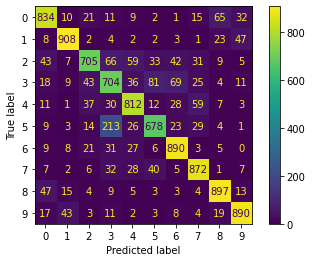

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(test_label_norm, np.round(y_pred_clasess))